In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
import torch
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preprocessed data

In [3]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv',index_col = 'loan_id')
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [4]:
df[df.isna() == True].count()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Note here there is a problem in dataset column as there is space in names which cause problem so let us rename the columns.

In [5]:
df.rename(columns = {' no_of_dependents': 'no_of_dependents',
                     ' education' : 'education', 
                     ' self_employed' : 'self_employed',
                     ' income_annum' : 'income_annum',
                     ' loan_amount' : 'loan_amount',
                     ' loan_term' :'loan_term',
                     ' cibil_score' : 'cibil_score',
                     ' residential_assets_value' : 'residential_assets_value', 
                     ' commercial_assets_value' : 'commercial_assets_value',
                     ' luxury_assets_value' : 'luxury_assets_value',
                     ' bank_asset_value' : 'bank_asset_value',
                     ' loan_status' : 'loan_status'}, 
                      inplace = True)
df.columns
col = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Graduate',
       'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes',
       'Total_assets_value']
Scaling = ['residential_assets_value','commercial_assets_value',	'luxury_assets_value'	,'bank_asset_value']

In [6]:
label_encoder  =LabelEncoder()
mx = MinMaxScaler()
def preprocess(df):
    y = df.pop('loan_status')
    y = label_encoder.fit_transform(y)
    
    df = pd.get_dummies(df)
    
    df['Total_assets_value'] = 0
    for i in Scaling:
        df['Total_assets_value'] += df[i] 
    
    df[col]=mx.fit_transform(df[col])
    df = df.drop(columns = Scaling)
    
    
    
    return df,y

df,y = preprocess(df)

## Graphing

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='no_of_dependents'>

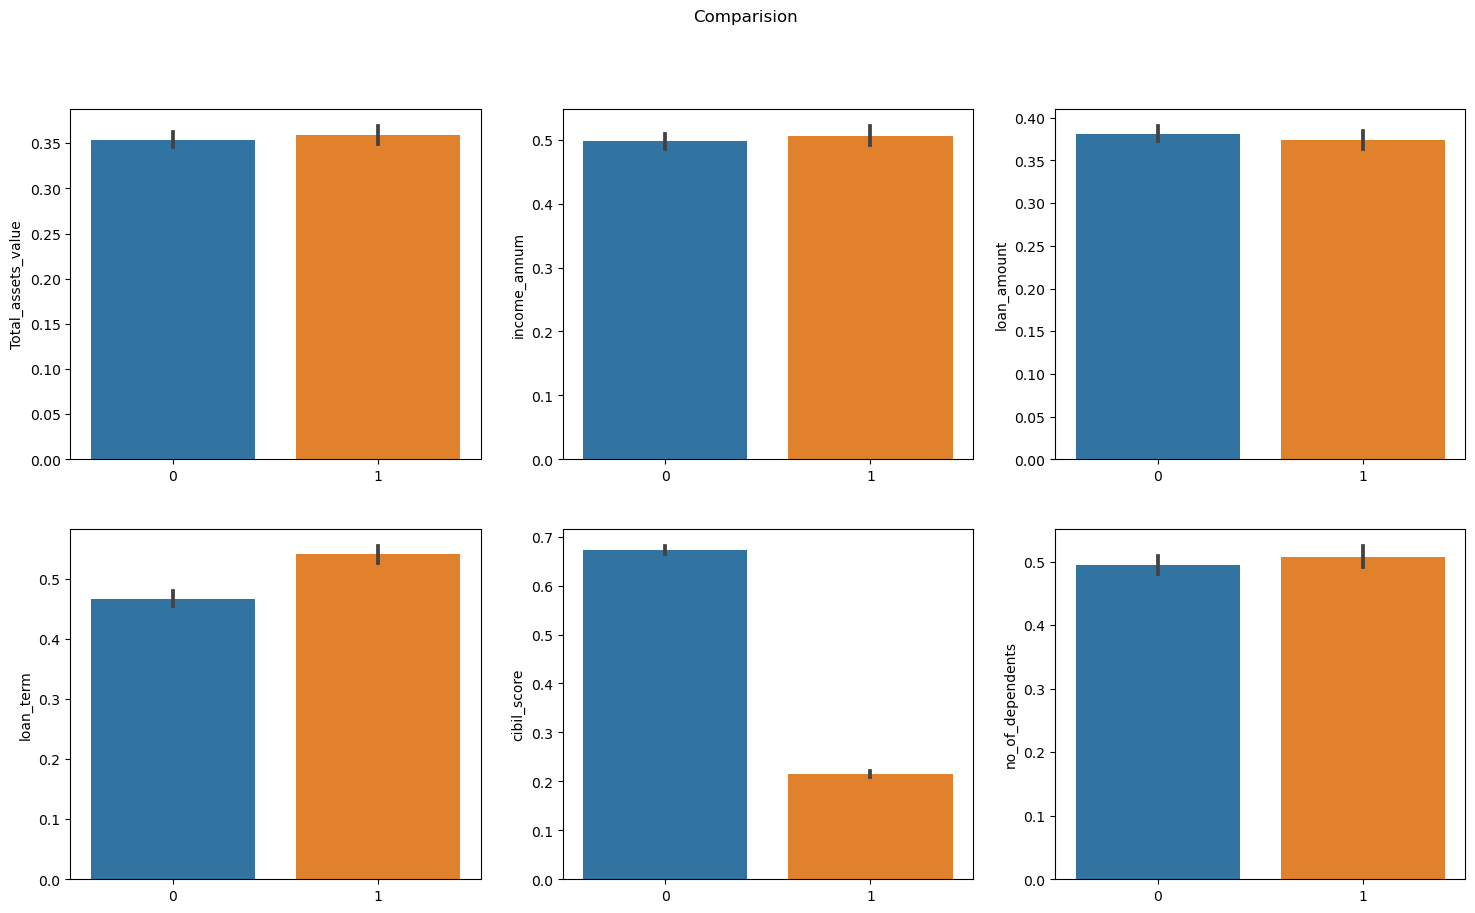

In [8]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparision')
sns.barplot( ax=axes[0, 0] ,x=y, y=df['Total_assets_value'])
sns.barplot( ax=axes[0, 1] ,x=y, y=df['income_annum'])
sns.barplot( ax=axes[0, 2] ,x=y, y=df['loan_amount'])
sns.barplot( ax=axes[1, 0] ,x=y, y=df['loan_term'])
sns.barplot( ax=axes[1, 1] ,x=y, y=df['cibil_score'])
sns.barplot( ax=axes[1, 2] ,x=y, y=df['no_of_dependents'])

# Modeling

In [9]:
import torch
torch.__version__
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test,y_train, y_test = train_test_split(df,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [11]:
 df.values

array([[0.4       , 0.96907216, 0.75510204, ..., 1.        , 0.        ,
        0.55703212],
       [0.        , 0.40206186, 0.30357143, ..., 0.        , 1.        ,
        0.18383167],
       [0.6       , 0.91752577, 0.75      , ..., 1.        , 0.        ,
        0.6345515 ],
       ...,
       [0.4       , 0.64948454, 0.60204082, ..., 1.        , 0.        ,
        0.42746401],
       [0.2       , 0.40206186, 0.31887755, ..., 1.        , 0.        ,
        0.3145072 ],
       [0.2       , 0.92783505, 0.75      , ..., 1.        , 0.        ,
        0.85160576]])

In [12]:

X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [13]:
#continue from 9:24
#https://www.youtube.com/watch?v=V_xro1bcAuA&t=29614s